In [1]:
from numpy.random import *

def addGaussianNoise(src):
    row,col,ch = src.shape
    mean = 0
    sigma = 20
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = src + gauss
    
    return noisy

def addSaltpepperNoise(src):
    row,col,ch = src.shape
    noisy = src
    for r in range(row):
        for c in range(col):
                random = randint(0,100)
                if(random == 0):
                    sp = randint(0,2)
                    if(sp == 0):
                        noisy[r,c,:] = 0
                    else:
                        noisy[r,c,:] = 255
    return noisy

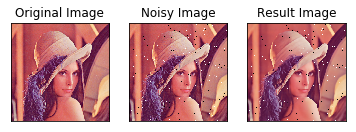

In [2]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lena.png')

img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_noisy = addSaltpepperNoise(img)
#img_noisy = addGaussianNoise(img)

cv2.imwrite("noise.png",img_noisy)

#result = cv2.blur(img,(5,5))
#result = cv2.GaussianBlur(img, (9,9), 5)
#result = cv2.medianBlur(img,3)
result = cv2.bilateralFilter(img,9,75,75)
#result = cv2.Laplacian(img_gray, cv2.CV_32F, ksize=5)

cv2.imwrite("result.png",result)

plt.subplot(131),plt.imshow(img_color.astype(np.uint8))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

img_noisy_true = cv2.cvtColor(img_noisy.astype(np.uint8), cv2.COLOR_BGR2RGB)
plt.subplot(132),plt.imshow(img_noisy_true)
plt.title('Noisy Image'), plt.xticks([]), plt.yticks([])

result_true = cv2.cvtColor(result.astype(np.uint8), cv2.COLOR_BGR2RGB)
plt.subplot(133),plt.imshow(result_true.astype(np.uint8))
plt.title('ResuIt Image'), plt.xticks([]), plt.yticks([])

plt.show()

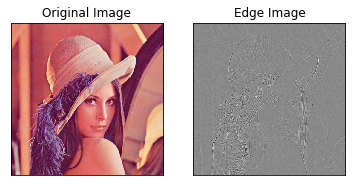

In [3]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lena.png')

img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel = np.array([[1, 2, 1],
                       [0, 0, 0],
                       [-1, -2, -1]])

#edge = cv2.filter2D(img_gray,cv2.CV_64F,kernel)
edge = cv2.Laplacian(img_gray, cv2.CV_64F, ksize=3)

cv2.imwrite("edge.png",edge)

plt.subplot(121),plt.imshow(img_color.astype(np.uint8))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(edge)
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.gray()
plt.show()

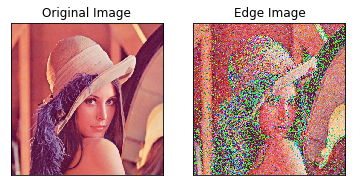

In [4]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lena.png')

img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.array([[-1, -1, -1],
                       [-1, 9, -1],
                       [-1, -1, -1]])

sharp = cv2.filter2D(img,cv2.CV_64F,kernel)

cv2.imwrite("sharp.png",sharp)

plt.subplot(121),plt.imshow(img_color.astype(np.uint8))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

sharp_true = cv2.cvtColor(sharp.astype(np.uint8), cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(sharp_true.astype(np.uint8))
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()

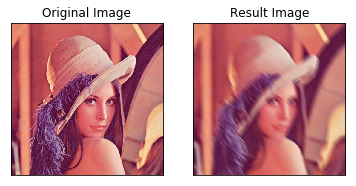

In [5]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lena.png')

img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

kernel = np.eye(15) /15

result = cv2.filter2D(img,cv2.CV_64F,kernel)

cv2.imwrite("result.png", result)

plt.subplot(121),plt.imshow(img_color.astype(np.uint8))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

result_true = cv2.cvtColor(result.astype(np.uint8), cv2.COLOR_BGR2RGB)
plt.subplot(122),plt.imshow(result_true.astype(np.uint8))
plt.title('Result Image'), plt.xticks([]), plt.yticks([])

plt.show()

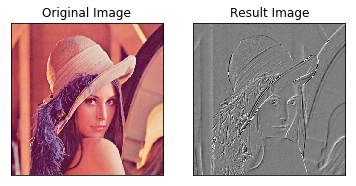

In [6]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('lena.png')

img_color = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

kernel = np.array([[1, 0, 0],
                       [0, 0, 0],
                       [0, 0, -1]])

result = cv2.filter2D(img_gray,cv2.CV_64F,kernel)
add = np.full(result.shape, 127)
result += add

cv2.imwrite("result.png", result)

plt.subplot(121),plt.imshow(img_color.astype(np.uint8))
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(result.astype(np.uint8))
plt.title('Result Image'), plt.xticks([]), plt.yticks([])

plt.show()